# Time Series Performances

## Introduction

Acquisition performance is key concept to assess data representativeness. As for ECDF computation, Time Series toolbox provides a convenient method to assess performance. What mainly differs among those quantity is the way to render it.

### Imports

We import required packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from odapi.connectors import Irceline

In [2]:
from odapi.settings import settings
settings.logger.setLevel(40)

### Dataset & Client

We load the dataset we previously stored and create the Irceline client:

In [3]:
data = pd.read_pickle("dump/brussels_2014.pickle")
client = Irceline()

## Performances

### Global performance

To compute global performance of time series, just apply the method on DataFrame:

In [4]:
perf = data.apply(client.performance)

The performance method returns several metadata to describe the global performance:

In [5]:
perf.filter(regex='NO.*/41R0(02|12)')

seriekey,NO/41R002 (µg/m³),NO/41R012 (µg/m³),NO2/41R002 (µg/m³),NO2/41R012 (µg/m³)
sitekey,41R002,41R012,41R002,41R012
measurekey,NO,NO,NO2,NO2
serieid,6614,6621,6615,6622
left,2014-01-01 00:00:00+01:00,2014-01-01 00:00:00+01:00,2014-01-01 00:00:00+01:00,2014-01-01 00:00:00+01:00
right,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00
start,2014-01-01 01:00:00+01:00,2014-01-01 01:00:00+01:00,2014-01-01 01:00:00+01:00,2014-01-01 01:00:00+01:00
stop,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00,2014-12-31 23:00:00+01:00
expected_count,8759,8759,8759,8759
real_count,8312,8089,8312,8118
total_count,8760,8760,8760,8760


Refer to method interface documentation to get details on each quantity and learn more on how to control the impact of missing values on performance score.

#### Pivot

We can pivot the result above to get a clear overview of the global performance:

In [6]:
cp = perf.droplevel([0, 3], axis=1).stack().loc['performance', :].T.astype(float)
cp.style.format('{:.1%}', na_rep='-')

measurekey,BC,CO,CO2,NO,NO2,O3,PM-10.0,PM-2.5,SO2,T,WD,WS
sitekey,,,,,,,,,,,,
41B004,-,88.0%,-,94.3%,94.3%,95.0%,-,-,-,-,-,-
41B006,-,78.6%,-,82.8%,82.8%,83.6%,-,-,-,-,-,-
41B008,-,94.7%,-,94.2%,94.2%,-,-,-,86.6%,-,-,-
41B011,-,-,-,95.9%,96.4%,96.8%,95.9%,93.8%,-,99.9%,-,-
41MEU1,-,-,-,94.4%,94.4%,-,96.7%,95.5%,90.3%,-,-,-
41N043,97.3%,93.4%,-,96.2%,96.2%,95.6%,96.8%,97.4%,96.8%,-,-,-
41R001,98.9%,89.5%,-,96.8%,96.8%,96.6%,98.3%,96.2%,97.1%,99.8%,99.8%,99.8%
41R002,98.9%,93.2%,95.5%,94.9%,94.9%,-,-,-,97.5%,-,-,-
41R012,94.7%,-,91.2%,92.4%,92.7%,92.4%,93.0%,88.3%,91.7%,95.4%,95.3%,95.4%


Or render it as an heatmap:

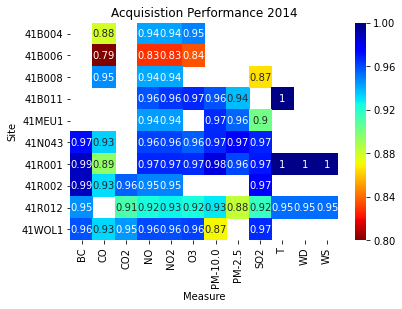

In [7]:
axe = sns.heatmap(cp, vmin=0.8, vmax=1, cmap='jet_r', annot=True)
axe.set_title("Acquisistion Performance 2014")
axe.set_xlabel("Measure")
_ = axe.set_ylabel("Site")

### Monthly performance

Method from the Time Serie toolbox are built to work with `apply` and `groupby`. It means `performance` method can be applied to subset of dataframe to assess, let's say monthly peformances:

In [8]:
pm = data.groupby(client.monthly).apply(client.performance)
pm = pm.swaplevel(-1, 0, axis=1).swaplevel(1, 2, axis=1).droplevel([2,3], axis=1)

In [9]:
pm.filter(regex='NO2/41R002').filter(regex='l_count|perf|fact')

,real_count,total_count,performance,fillfactor
measurekey,NO2,NO2,NO2,NO2
seriekey,NO2/41R002 (µg/m³),NO2/41R002 (µg/m³),NO2/41R002 (µg/m³),NO2/41R002 (µg/m³)
2014-01-01 00:00:00+01:00,723,744,0.973082,0.971774
2014-02-01 00:00:00+01:00,652,672,0.971684,0.970238
2014-03-01 00:00:00+01:00,660,743,0.888291,0.888291
2014-04-01 00:00:00+02:00,701,720,0.973611,0.973611
2014-05-01 00:00:00+02:00,723,744,0.971774,0.971774
2014-06-01 00:00:00+02:00,690,720,0.958333,0.958333
2014-07-01 00:00:00+02:00,609,744,0.818548,0.818548
2014-08-01 00:00:00+02:00,723,744,0.971774,0.971774


Then, it can be rendered as bar chart for example, to follow the monthly performance:

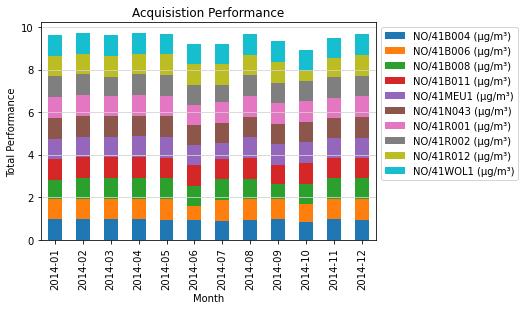

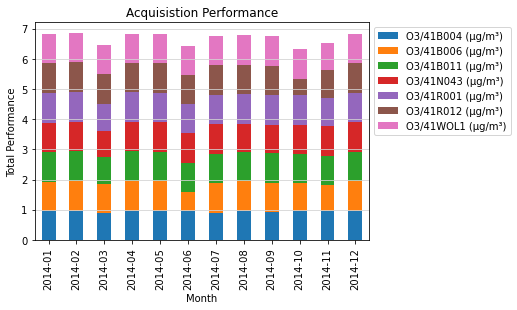

In [10]:
for k in ['NO', 'O3']:#pm.columns.levels[1]:
    axe = pm['performance'][k].plot(kind='bar', stacked=True)
    axe.set_title("Acquisistion Performance")
    axe.set_xlabel("Month")
    axe.set_ylabel("Total Performance")
    axe.set_xticklabels([l.get_text()[:7] for l in axe.get_xticklabels()])
    lgd = axe.legend(bbox_to_anchor=(1, 1), loc='upper left')
    axe.grid(axis='y', color='lightgray')